In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS


# Example dissimilarity matrix (this would be your data)
dissimilarity_matrix = np.array([[0, 14.5, .2, 3],
                                 [14.5, 0, 1, .1],
                                 [.2, 1, 0, 1],
                                 [3, .1, 1, 0]])

# Create an instance of MDS with parameters suited for NMDS
nmds = MDS(n_components=2, metric=False, dissimilarity='precomputed', random_state=42)

# Fit the model and transform the data
nmds_results = nmds.fit_transform(dissimilarity_matrix)

print("NMDS Results:")
print(nmds_results)


NMDS Results:
[[ 0.38228676  0.34236731]
 [-0.2865432   0.08663547]
 [ 0.26827166 -0.43992104]
 [-0.36326385  0.0082225 ]]


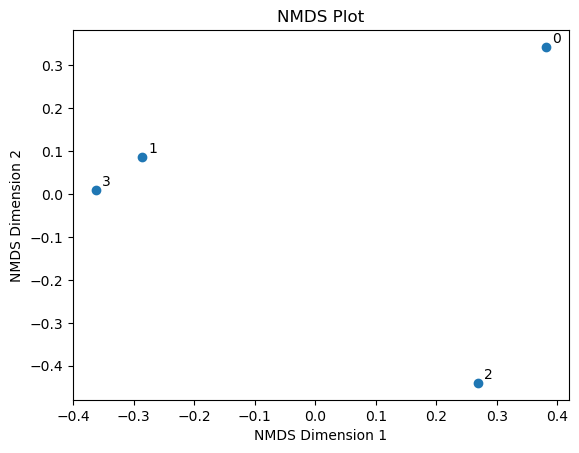

In [16]:
import matplotlib.pyplot as plt

plt.scatter(nmds_results[:, 0], nmds_results[:, 1])
for i, point in enumerate(nmds_results):
    plt.annotate(f'{i}', (point[0], point[1]), (point[0] + .01, point[1] + .01))
plt.title("NMDS Plot")
plt.xlabel("NMDS Dimension 1")
plt.ylabel("NMDS Dimension 2")
plt.show()


          Obs1      Obs2      Obs3      Obs4      Obs5      Obs6
Obs1  0.000000  0.281250  0.139415  0.443299  0.725888  0.739130
Obs2  0.281250  0.000000  0.145374  0.327103  0.642512  0.658986
Obs3  0.139415  0.145374  0.000000  0.384768  0.690701  0.705353
Obs4  0.443299  0.327103  0.384768  0.000000  0.416667  0.440000
Obs5  0.725888  0.642512  0.690701  0.416667  0.000000  0.028571
Obs6  0.739130  0.658986  0.705353  0.440000  0.028571  0.000000


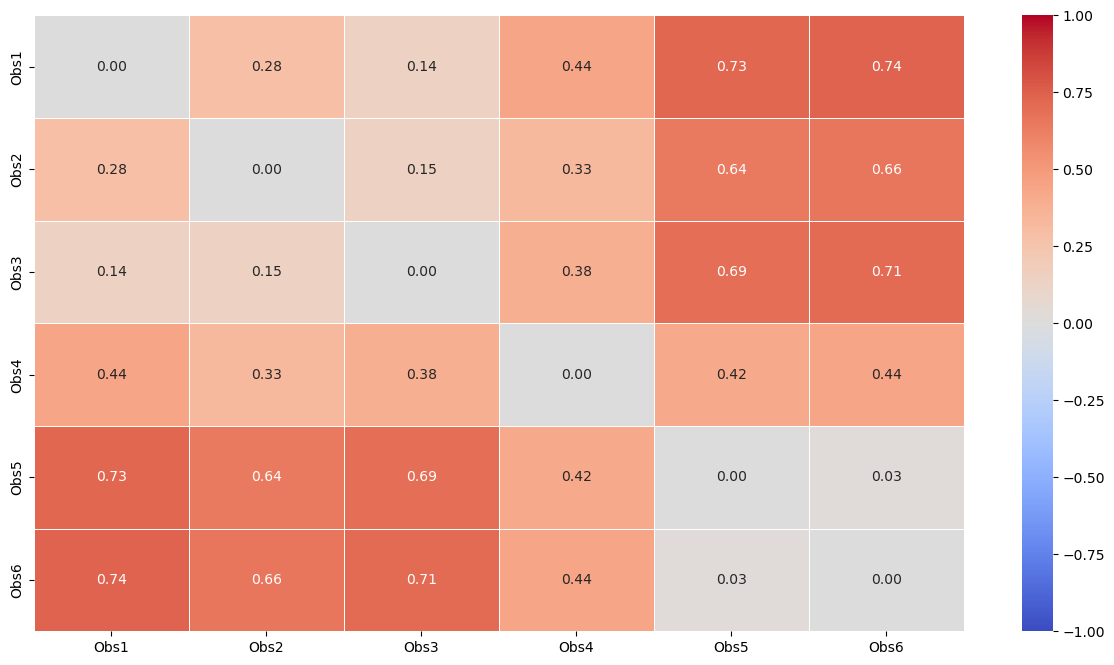

In [38]:
# Create the example data
data = pd.DataFrame({
    'Feature1': [0.5, 1.1, 0.7, 1, 7, 7],
    'Feature2': [1.2, 0.8, 1.0, 3, 7, 8],
    'Feature3': [0.5, 0.9, 0.7, 2, 2, 2],
    'Feature4': [0.5, 0.9, 0.71, 1, 1, 1],
}, index=['Obs1', 'Obs2', 'Obs3', 'Obs4', 'Obs5', 'Obs6'])

# Calculate the Bray-Curtis dissimilarity matrix
bray_curtis_dissimilarity = pdist(data, metric='braycurtis')

# Convert to squareform to get the matrix form
dissimilarity_matrix = squareform(bray_curtis_dissimilarity)

# Display the dissimilarity matrix
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=data.index, columns=data.index)
print(dissimilarity_df)
import seaborn as sns
plt.figure(figsize=(15, 8))  # Optional: Adjust size of the plot
sns.heatmap(dissimilarity_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Show the plot
plt.show()
plt.close()

In [41]:
# Initialize NMDS model
nmds = MDS(n_components=2, metric=False, dissimilarity='precomputed', random_state=42)

# Fit NMDS model using the dissimilarity matrix
nmds_results = nmds.fit_transform(dissimilarity_matrix)
print(nmds_results)
# Create a DataFrame for NMDS results
nmds_df = pd.DataFrame(nmds_results, index=data.index, columns=['NMDS1', 'NMDS2'])

# Display NMDS coordinates
print(nmds_df)


[[ 0.52882856  0.032634  ]
 [-0.33593423 -0.32637303]
 [-0.02096564  0.54503843]
 [ 0.16540432  0.16495666]
 [ 0.13154028 -0.40051185]
 [-0.47496783  0.02987202]]
         NMDS1     NMDS2
Obs1  0.528829  0.032634
Obs2 -0.335934 -0.326373
Obs3 -0.020966  0.545038
Obs4  0.165404  0.164957
Obs5  0.131540 -0.400512
Obs6 -0.474968  0.029872


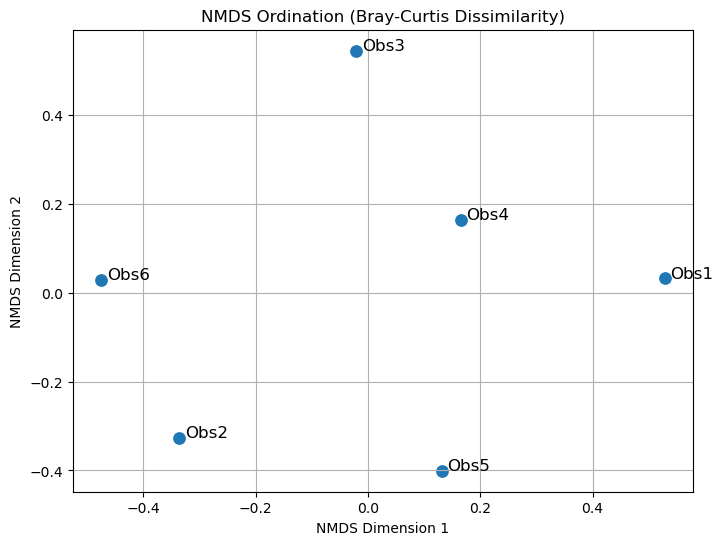

In [40]:
# Create a scatter plot of the NMDS results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NMDS1', y='NMDS2', data=nmds_df, s=100)

# Annotate the points with observation labels
for i in nmds_df.index:
    plt.text(nmds_df.loc[i, 'NMDS1'] + 0.01, nmds_df.loc[i, 'NMDS2'], i, fontsize=12)

plt.title('NMDS Ordination (Bray-Curtis Dissimilarity)')
plt.xlabel('NMDS Dimension 1')
plt.ylabel('NMDS Dimension 2')
plt.grid(True)
plt.show()


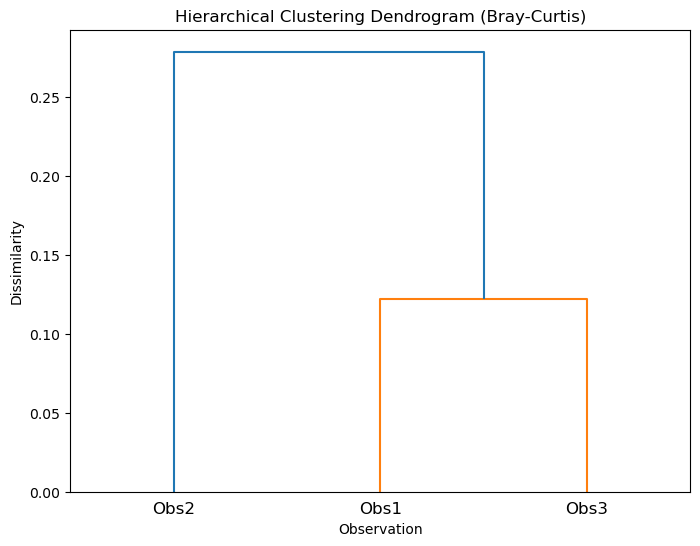

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Bray-Curtis dissimilarity
Z = linkage(bray_curtis_dissimilarity, method='average')

# Plot a dendrogram
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=data.index)
plt.title('Hierarchical Clustering Dendrogram (Bray-Curtis)')
plt.xlabel('Observation')
plt.ylabel('Dissimilarity')
plt.show()


In [44]:
nmds_coords = pd.read_excel('nmds_coords.xlsx')
nmds_coords = nmds_coords[nmds_coords['type'] == 'HI']
nmds_coords

,NMDS1,NMDS2,type,FlowCamID,regionYear
1,-0.053239,-0.376700,HI,21_10_05_NL_S1_Z17_0752_250,NL 2021
4,-0.120754,-0.313470,HI,21_10_05_NL_S1_Z17_1406_250,NL 2021
7,-0.224702,-0.321983,HI,21_10_05_NL_S1_Z41_0854_250,NL 2021
10,-0.204011,-0.278456,HI,21_10_05_NL_S1_Z41_1327_250,NL 2021
13,-0.048949,-0.386167,HI,21_10_06_NL_S1_Z17_0802_250,NL 2021
16,-0.126411,-0.510360,HI,21_10_06_NL_S1_Z17_1442_250,NL 2021
19,-0.176156,-0.330368,HI,21_10_06_NL_S1_Z41_0839_250,NL 2021
22,-0.186609,-0.351164,HI,21_10_06_NL_S1_Z41_1412_250,NL 2021
25,-0.130954,-0.540829,HI,21_10_07_NL_S1_Z17_0830_250,NL 2021
28,-0.189424,-0.453312,HI,21_10_07_NL_S1_Z17_1459_250,NL 2021


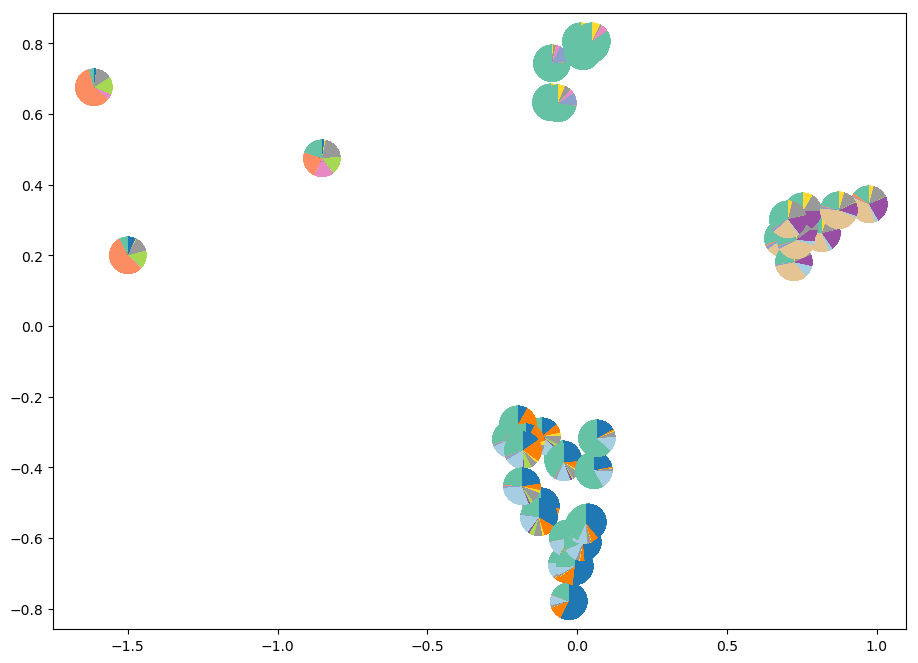

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(11, 8))
for i, row in nmds_coords.iterrows():
# Load an image to use as a marker
    img = mpimg.imread(f'pies/{row['FlowCamID']}.png')
    alpha_value = 0.5
    # img = np.dstack((img, np.full(img.shape[:2], alpha_value))) 

    if img.shape[2] == 3:  # RGB format
        img = np.dstack((img, np.ones((img.shape[0], img.shape[1]))))
    x = row['NMDS1']
    y = row['NMDS2']
    ax.scatter(x, y, color='black')  # Optional: display the scatter points
    # Create an OffsetImage with the loaded image
    imagebox = OffsetImage(img, zoom=0.08)  # Adjust the zoom factor to change the image size
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Show the plot
plt.show()

